<h1>Héctor Rojas Pescio - Desafío Mecanismos de Votación</h1>

<h2>Ejercicio 1 - Preparación del Ambiente de Trabajo</h2>
<p>
A continuación se le presenta un código que agrupa las variables por grupos. Cada uno de éstos
hace referencia a alguna característica de los registros en la base de datos. Genere una análisis
descriptivo de cada uno de los atributos. Puede utilizar la función grid_plot_batch que se
encuentra en el archivo helpers.py.</p>

In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import helpers as hlp
import lec10_graphs as afx

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

<ul>
<li>Describa el comportamiento de las variables.</li>
<li>Dada la naturaleza de los atributos, es probable que algunas mediciones estén correlacionadas
entre sí. Para ello, genere un diagnóstico previo de multicolinealidad utilizando la función
identify_high_correlations
que se encuentra en el archivo helpers.py . Para todos
aquellos atributos que tengan una correlación de .8, reporte sus nombres.</li>
<li>Antes de generar los conjuntos de entrenamiento y validación, preprocese los datos con los
siguientes pasos:
    <ul>
<li>Recodifique la variable shares en una variable binaria que identifique como 1 todos los
registros con más de 1400 "compartir" y 0 de lo contrario. Para evitar multicolinealidad,
elimine la variable shares posteriormente.</li>
<li>Elimine todas las variables que presentaban una correlación mayor a .8. Este paso es para
evitar la multicolinealidad de los atributos.</li>
<li>Genere un análisis de Componentes Principales para extraer las principales 30
dimensiones. Guarde estas dimensiones en un nuevo objeto.</li>
</ul>
</li>
</ul>

In [2]:
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [3]:
df.shape

(39644, 61)

In [8]:
# las etiquetas de las columnas presentan un espacio extra, con ésto lo podemos eliminar
df.columns = [i.replace(' ', '') for i in df.columns]

# eliminamos el string de url que no sirve para el análisis
df = df.loc[:, 'n_tokens_title':'shares']

# generamos el conjunto de variables
qnty = df.filter(regex='^n_', axis=1)
channel = df.filter(regex='^data_', axis=1)
days = df.filter(regex=re.compile("weekday|weekend"), axis=1)
sentiments = df.filter(regex=re.compile("negative|positive|subjectivity"), axis=1)
lda = df.filter(regex='^LDA_\d', axis=1)
keywords = df.filter(regex='^kw_', axis=1)

In [9]:
df.sample()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
5708,12.0,147.0,0.739726,1.0,0.898876,4.0,2.0,0.0,1.0,4.510204,...,0.2,0.5,-0.688095,-1.0,-0.25,0.89,-0.781667,0.39,0.781667,4400


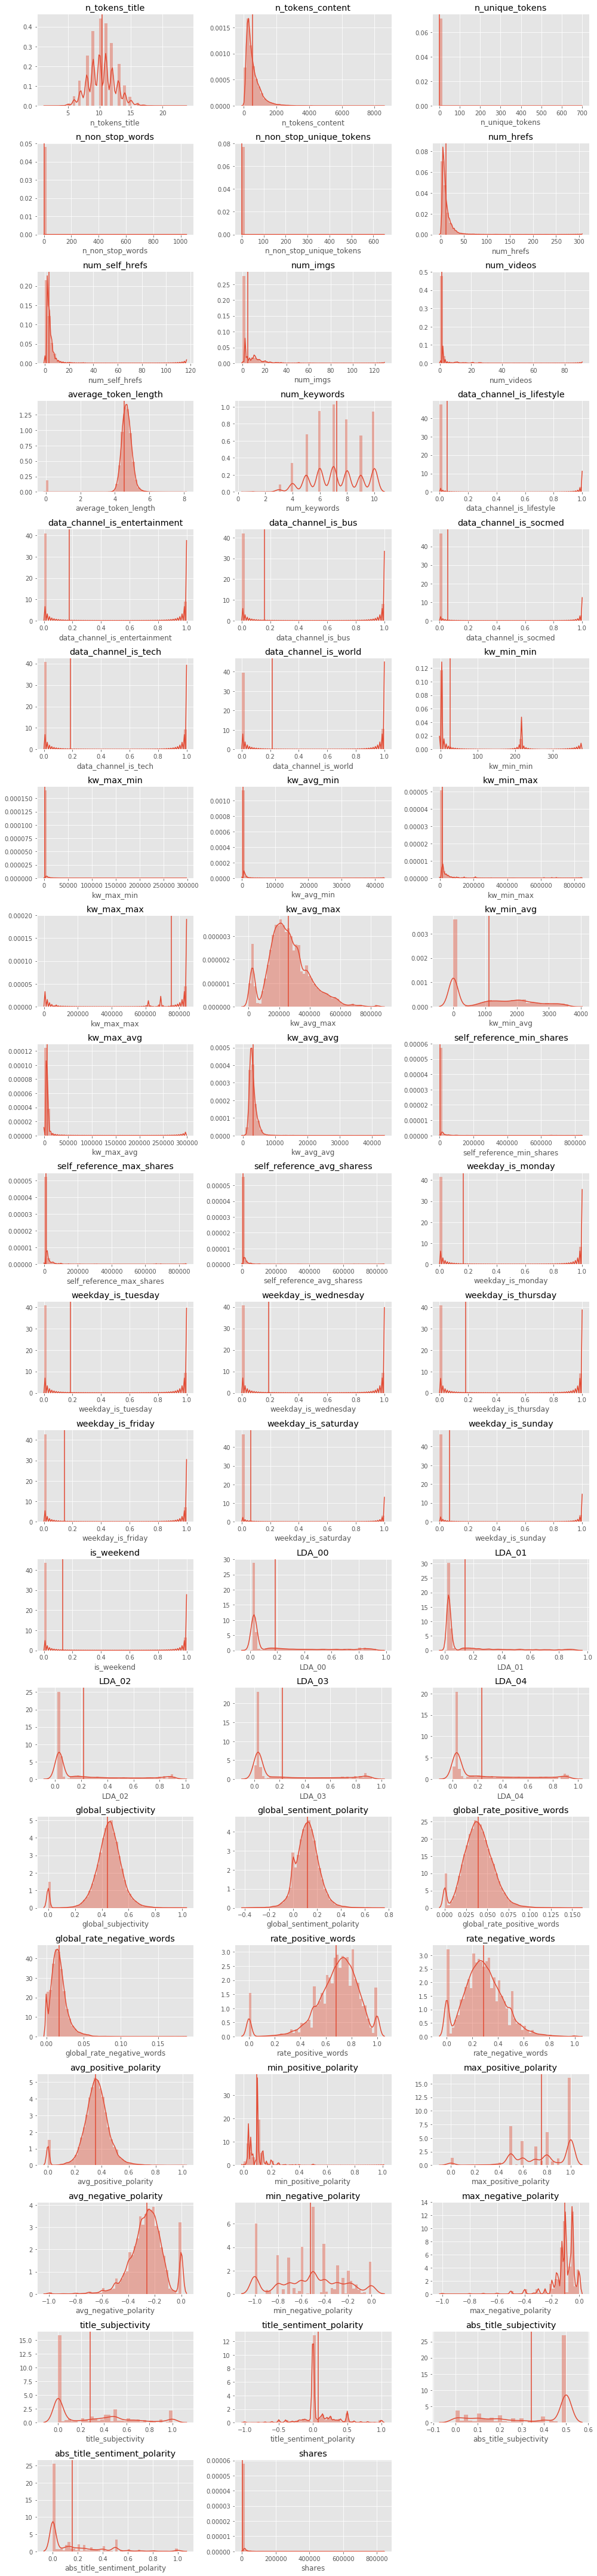

In [10]:
#hlp.grid_plot_batch(df, df.columns, 'plot')
plt.figure(figsize=(14, 60))
rows= 20; cols = 3
afx.plot_describe_variables(df, rows=rows, cols=cols)

In [11]:
df_corr = hlp.identify_high_correlations(df)

In [12]:
for index, row in df_corr.iterrows() :
    if row['value'] > .8 :
        print('Var 1: {} Var 2: {}'.format(row['variable'], row['var2']))

Var 1: n_non_stop_words Var 2: n_unique_tokens
Var 1: n_non_stop_unique_tokens Var 2: n_unique_tokens
Var 1: n_non_stop_unique_tokens Var 2: n_non_stop_words
Var 1: kw_avg_min Var 2: kw_max_min
Var 1: kw_avg_avg Var 2: kw_max_avg
Var 1: self_reference_avg_sharess Var 2: self_reference_min_shares
Var 1: self_reference_avg_sharess Var 2: self_reference_max_shares
Var 1: LDA_02 Var 2: data_channel_is_world


In [13]:
df['shares_bin'] = np.where(df['shares'] > 1400, 1, 0)

In [14]:
df.sample(3)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_bin
26895,9.0,823.0,0.468712,1.0,0.617871,12.0,1.0,2.0,1.0,5.238153,...,0.5,-0.162582,-0.5,-0.05,0.000000,0.000000,0.500000,0.000000,865,0
29679,11.0,880.0,0.464082,1.0,0.656920,8.0,4.0,1.0,2.0,4.301136,...,1.0,-0.437963,-1.0,-0.15,0.535714,0.285714,0.035714,0.285714,2100,1
14416,8.0,381.0,0.612813,1.0,0.712644,26.0,3.0,22.0,0.0,4.745407,...,1.0,-0.241667,-0.4,-0.15,0.000000,0.000000,0.500000,0.000000,6100,1


In [15]:
df2 = df

In [16]:
#Eliminar todas las variables que presentaban una correlación mayor a .8
df2 = df2.drop(['n_non_stop_words', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'n_non_stop_words', 'kw_avg_min', 'kw_max_min', 'kw_avg_avg', 'kw_max_avg', 'self_reference_avg_sharess', 'self_reference_min_shares', 'self_reference_max_shares', 'LDA_02', 'data_channel_is_world'], axis=1)

In [17]:
#Eliminar variable shares debido a que partir de esta se genera la variable objetivo
df2 = df2.drop(['shares'], axis=1)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 47 columns):
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null float64
data_channel_is_tech             39644 non-null float64
kw_min_min                       39644 non-null float64
kw_min_max                       39644 non-null float64
kw_max_max                       39644 non-null flo

In [19]:
df2.dropna(inplace=True)

In [21]:
#Preprocesamiento
y_vec = df2.loc[:, 'shares_bin']
X_mat = df2.drop(['shares_bin'], axis =1)

from sklearn.model_selection import train_test_split
x_train_pre, x_test_pre, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=17536)

In [22]:
x_train_pre.shape

(26561, 46)

In [23]:
from sklearn.preprocessing import StandardScaler

x_train_numeric = x_train_pre.loc[:, x_train_pre.columns != 'shares_bin']
x_test_numeric = x_test_pre.loc[:, x_test_pre.columns != 'shares_bin']

std_scaler = StandardScaler().fit(x_train_numeric)

x_numeric_scaled_train = std_scaler.transform(x_train_numeric)
x_numeric_scaled_test = std_scaler.transform(x_test_numeric)

In [24]:
from sklearn.decomposition import PCA

pca_transform = PCA(n_components = 30, svd_solver= 'full')

X_train = pd.DataFrame(pca_transform.fit_transform(x_numeric_scaled_train))
X_test = pd.DataFrame(pca_transform.fit_transform(x_numeric_scaled_test))

In [25]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.963899,-1.119404,0.397953,-1.447271,-3.389104,1.208981,0.365476,-0.496534,-0.655517,-0.213917,...,0.489810,1.003625,-1.383631,-0.291844,0.454306,0.015662,-1.449192,-1.131648,0.394356,0.139313
1,-0.482653,-0.705075,-2.141268,0.116119,1.021339,0.933709,3.317077,-1.956709,2.165150,3.699697,...,-0.839259,-0.062898,0.178431,-0.619316,-0.961063,-0.263590,-0.546383,-0.041857,0.955175,0.129282
2,1.445156,1.141359,-1.859447,-1.008301,1.393629,-2.729152,0.491010,-1.664379,0.707064,0.815375,...,0.926096,-0.476596,-0.619490,0.144119,-0.726744,-0.627372,-0.702432,-0.351040,-0.145862,0.615007
3,-0.904046,-1.464643,0.072248,-0.191515,2.154174,0.555161,3.514009,-1.311576,-0.066824,1.594040,...,-0.332729,-0.096813,-0.187260,-0.096979,-0.257748,0.073410,0.149270,0.178461,0.409492,-0.861119
4,-0.982210,3.038649,0.882288,1.534521,-0.505539,-0.734039,-1.256665,-1.671938,1.005637,-0.301547,...,-1.372871,-0.751674,-0.869774,-1.014480,-0.199811,0.255717,-0.881286,0.493849,0.099546,0.052922


<h2>Ejercicio 2 - Evaluación de modelos individuales</h2>
<ul>
<li>A continuación generará una serie de modelos que se incorporarán posteriormente al comité de
votación. Para ello, se solicita que:</li>
<li>Importe los módulos correctamente.</li>
<li>Para cada uno de ellos, genere un reporte en las métricas de desempeño respecto a
Precision , Recall , F1 . Puede hacer uso de la función
plot_classification_report disponible en el archivo helpers.py .</li>
<li>Comente el desempeño general de cada uno
La lista de modelos es la siguiente. Cabe destacar que la mayoría de éstos corresponden a
implementaciones vanilla, salvo que se indique lo contrario:
    <ul>
<li>Regresión Logística.</li>
<li>Algoritmo de KMedias.</li>
<li>Árbol de Clasificación con un max_depth=1 .</li>
<li>Árbol de Clasificación con un max_depth=4 .</li></ul>
</li>
</ul>

In [26]:
# Módulos de preprocesamiento
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Módulos ensamblador
from sklearn.ensemble import VotingClassifier

# Módulos de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [27]:
rep_seed = 17536

estimators = [
                ('Logistic Regression', LogisticRegression(random_state=rep_seed)),
                ('Kmeans', KMeans(n_clusters=2, random_state=rep_seed)),
                ('Decision Tree Classifier 1', DecisionTreeClassifier(random_state=rep_seed, max_depth=1)),
                ('Decision Tree Classifier 4', DecisionTreeClassifier(random_state=rep_seed, max_depth=4))
            ]

In [28]:
x_numeric_scaled_test.shape

(13083, 46)

In [29]:
from sklearn.metrics import classification_report, accuracy_score

for index, value in enumerate(estimators):
    class_pred = value[1].fit(X_train, y_train).predict(X_test)
    print(value[0].upper(),'\n------------------------------------------------------')
    print(classification_report(y_test, class_pred))
    print('Accuracy score: {}\n\n'.format(accuracy_score(y_test, class_pred).round(3)))

LOGISTIC REGRESSION 
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      6683
           1       0.60      0.59      0.59      6400

   micro avg       0.60      0.60      0.60     13083
   macro avg       0.60      0.60      0.60     13083
weighted avg       0.60      0.60      0.60     13083

Accuracy score: 0.605


KMEANS 
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.97      0.67      6683
           1       0.54      0.03      0.06      6400

   micro avg       0.51      0.51      0.51     13083
   macro avg       0.52      0.50      0.37     13083
weighted avg       0.52      0.51      0.37     13083

Accuracy score: 0.513


DECISION TREE CLASSIFIER 1 
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.

<p><b>Rpta.</b> El revisar las métricas de desempeño generales (weighted avg f1-score y accuracy score), LOGISTIC REGRESSION y DECISION TREE CLASSIFIER 4 obtuvieron el mejor desempeño, KMEANS por el contrario obtuvo el peor desempeño (.37 y .51).</p>

<h2>Ejercicio 3 - Entrenamiento de Comité</h2>
<ul>
<li>Entrene el comité de clasificadores sin modificar el esquema de votación.</li>
<li>Reporte el desempeño a nivel de cada clase para cada métrica.</li>
</ul>

In [30]:
voting_classifier = VotingClassifier(estimators).fit(X_train, y_train).predict(X_test)

In [31]:
print('VOTING CLASSIFIER\n------------------------------------------------------')
print(classification_report(y_test, voting_classifier))
print('Accuracy score: {}\n\n'.format(accuracy_score(y_test, voting_classifier).round(3)))

VOTING CLASSIFIER
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.94      0.68      6683
           1       0.67      0.13      0.21      6400

   micro avg       0.54      0.54      0.54     13083
   macro avg       0.60      0.53      0.45     13083
weighted avg       0.60      0.54      0.45     13083

Accuracy score: 0.543




<p><b>Rpta.</b> La implementación del comité sin modificar el esquema de votación obtuvo una métrica f1-score de .45 y accuracy score de .543 por debajo del promedio obtenido (.558) por los modelos ensamblados.</p>

<h2>Ejercicio 4 - Calibración de Comité con Ponderadores</h2>
<ul>
<li>El base al comportamiento de los clasificadores individuales del ensamble, proponga dos
esquemas de ponderación para mejorar el desempeño del modelo.</li>
<li>Reporte el desempeño del mejor ensamble heterogéneo.</li>
</ul>

<h3>Primer esquema</h3>

In [32]:
#Nuevo comités con estimadores con mejores desempeño previo
estimators_1 = [
                ('Logistic Regression', LogisticRegression(random_state=rep_seed)),
                ('Decision Tree Classifier 4', DecisionTreeClassifier(random_state=rep_seed, max_depth=10))
            ]

voting_classifier_1 = VotingClassifier(estimators_1).fit(X_train, y_train).predict(X_test)

In [33]:
print('VOTING CLASSIFIER 1\n------------------------------------------------------')
print(classification_report(y_test, voting_classifier_1))
print('Accuracy score: {}\n\n'.format(accuracy_score(y_test, voting_classifier_1).round(3)))

VOTING CLASSIFIER 1
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.77      0.66      6683
           1       0.62      0.41      0.49      6400

   micro avg       0.59      0.59      0.59     13083
   macro avg       0.60      0.59      0.57     13083
weighted avg       0.60      0.59      0.58     13083

Accuracy score: 0.59




<h3>Segundo esquema</h3>

In [34]:
#Nuevo comités con estimadores con mejores desempeño previo incluyendo hiper parámetro peso

weights_hyperparams = [.6, .4]

voting_classifier_2 = VotingClassifier(estimators=estimators_1, weights=weights_hyperparams).fit(X_train, y_train).predict(X_test)

In [35]:
print('VOTING CLASSIFIER 2\n------------------------------------------------------')
print(classification_report(y_test, voting_classifier_2))
print('Accuracy score: {}\n\n'.format(accuracy_score(y_test, voting_classifier_2).round(3)))

VOTING CLASSIFIER 2
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      6683
           1       0.60      0.59      0.59      6400

   micro avg       0.60      0.60      0.60     13083
   macro avg       0.60      0.60      0.60     13083
weighted avg       0.60      0.60      0.60     13083

Accuracy score: 0.605




<p><b>Rpta.</b> De acuerdo a los resultados obtenidos ambos comités obtuvieron un mejor desempeño que el comité con implementación 'vanilla'. Al incorporar hiperparámetros en el segundo esquema se obtuvo leve mejora +.02 en f1-score.</p>